<a href="https://colab.research.google.com/github/kapilchauhary/Regress/blob/main/Kaggle_Project_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Project : Titanic - Machine Learning from Disaster

  * Objective : Predict survival on the Titanic.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train(1).csv to train(1).csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['train(1).csv']))

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
print(df.shape)
print(df.size)

(891, 12)
10692


In [ ]:
columns=df.columns

In [ ]:
for col in df.columns:
  print(df[col].value_counts())

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtyp

In [ ]:
print(columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


* Columns Description :
    * Survival - Survival (0 = No; 1 = Yes).
    * Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * Name - Name
    * Sex - Sex
    * Age - Age
    * Sibsp - Number of Siblings/Spouses Aboard
    * Parch - Number of Parents/Children Aboard
    * Ticket - Ticket Number
    * Fare - Passenger Fare
    * Cabin - Cabin
    * Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
numerical_cols = df.select_dtypes(exclude='object').columns
categorical_cols = df.select_dtypes(include='object').columns

In [ ]:
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
categorical_cols


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
#df.corrwith(df['Survived']).sort_values(by=abs(df.corrwith(df['Survived'])),ascending=False)


In [ ]:
corr_values= abs(df.corrwith(df['Survived']))
df.sort_values(by=corr_values)

KeyError: ignored

Conclusion from above code, we can correct following points ⁉
  * 'Name' and 'PassengerId' features are non-standard and don't contribute to 'Survived' hence we can drop this.
  * 'Cabin' feature may be dropped as this does not directly contribute to 'Survived' class and contains many null values.
  * 'Ticket' feature may be dropped as this does not directly contribute to 'Survived' class.

* Columns to remove are = ['Name','Cabin','Ticket', PassengerId']

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving test(1).csv to test(1) (1).csv


In [ ]:
# Remove Columns from Test Also
# For this we need to import test.csv
import io
df_test=pd.read_csv(io.BytesIO(uploaded2['test(1).csv']))

In [155]:
import io
df_test2=pd.read_csv(io.BytesIO(uploaded2['test(1).csv']))

In [ ]:
df=df.drop(columns=['Name','Cabin','Ticket', 'PassengerId'],axis=1)

In [ ]:
df_test=df_test.drop(columns=['Name','Cabin','Ticket', 'PassengerId'],axis=1)

In [ ]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


By looking we can see outliers in age and fares.


# Visualisation and feature Engineering

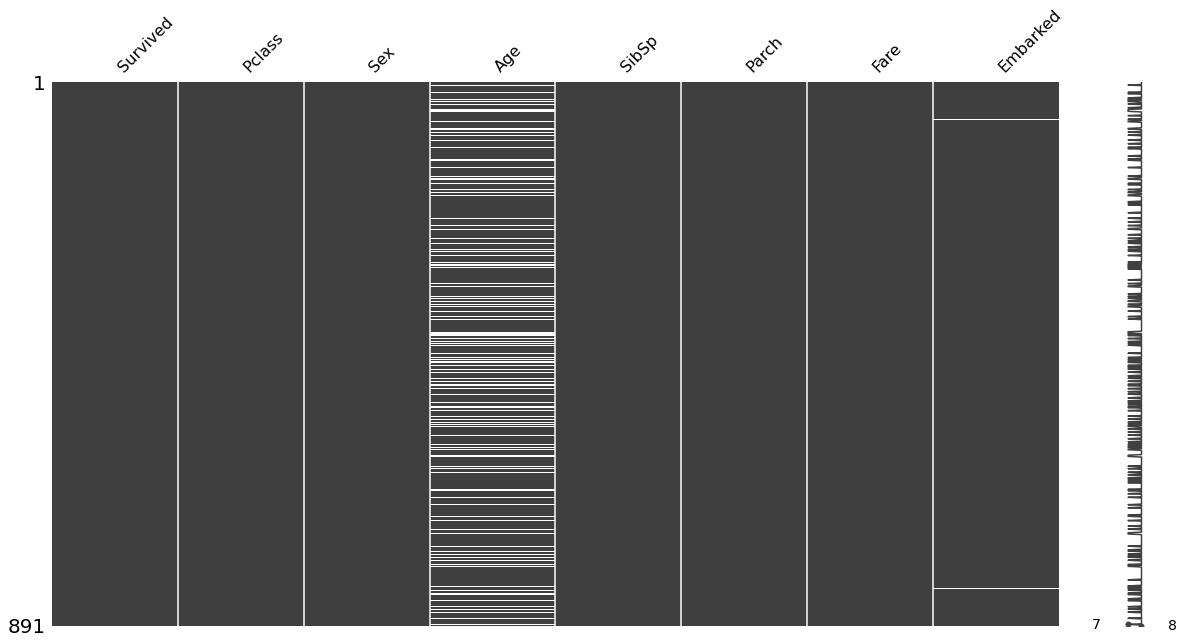

In [ ]:
# View Missing Values in Data
msno.matrix(df, figsize = (20,10))


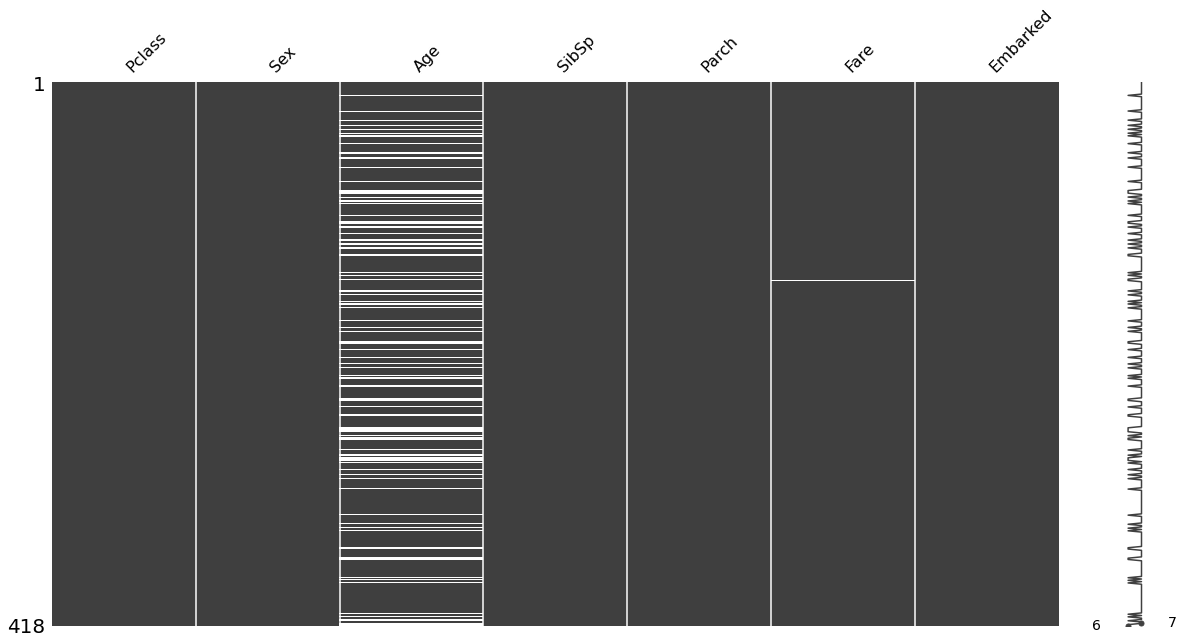

In [ ]:


msno.matrix(df_test, figsize = (20,10))

In [ ]:
((df['Age'].isnull().sum())/len(df))*100

19.865319865319865

In [ ]:
((df_test['Age'].isnull().sum())/len(df_test))*100

20.574162679425836

In [ ]:
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

We can see here that training DataFrame(df) has missing values in Age(a lot = 177 and ~20% of total available ages in hand) and Embarked(minimal=2 and ~21% of total available ages in hand
) and on the other hand testing DataFrame(df_test) has missing values in Age(a lot=86) and Fare(minimal=1).

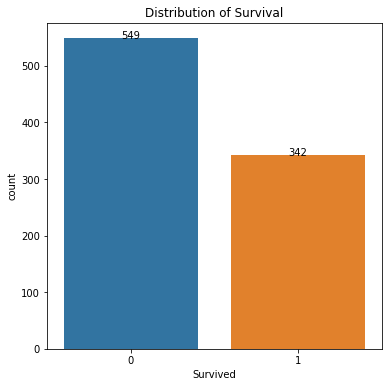

In [ ]:
# Visualize Each Count
fig, ax = plt.subplots(figsize=(6,6))
graph = sns.countplot(ax=ax,x=df['Survived'], data = df)
graph.set_title('Distribution of Survival', fontsize = 12)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Here we can see out of 891, 549 didn't survive while 342 survived.

Now Group By Each Feature as per survival.

In [ ]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

Here we can see that survival count for Female member is high as compare to male member.

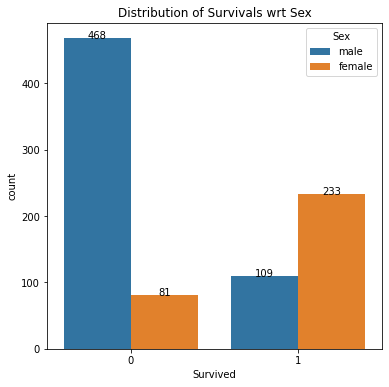

In [ ]:
plt.subplots(figsize=(6,6))
graph = sns.countplot(x=df['Survived'], data = df, hue='Sex',)
graph.set_title('Distribution of Survivals wrt Sex', fontsize = 12)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [ ]:
df.groupby('Survived')['Pclass'].value_counts()

Survived  Pclass
0         3         372
          2          97
          1          80
1         1         136
          3         119
          2          87
Name: Pclass, dtype: int64

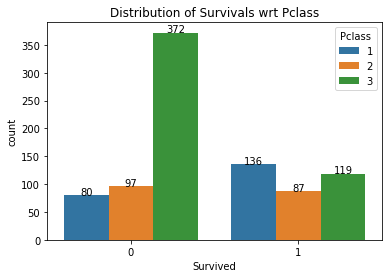

In [ ]:
graph = sns.countplot(x=df['Survived'], data = df, hue='Pclass',)
graph.set_title('Distribution of Survivals wrt Pclass', fontsize = 12)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

Major count of members who didn't survive was from Class : 3

Was Class a matter in this?


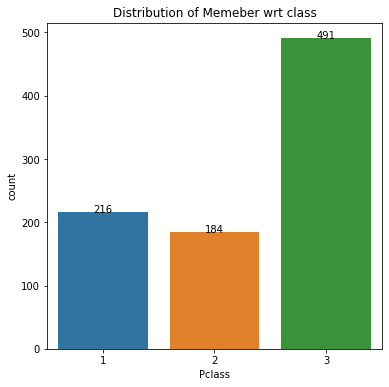

In [ ]:
plt.subplots(figsize=(6,6))
graph=sns.countplot(x=df['Pclass'],data=df)
graph.set_title("Distribution of Memeber wrt class")
for p in graph.patches:
  height=p.get_height()
  graph.text(p.get_x()+p.get_width()/2,height+0.1,height,ha='center')

In [ ]:
Class_1_per = [(80/216)*100]
Class_2_per = [(97/184)*100]
Class_3_per = [(80/491)*100]

In [ ]:
print("Class_1_percentage_died:{}".format(Class_1_per),"\nClass_2_percentage_died:{}".format(Class_2_per),"\nClass_3_percentage_died:{}".format(Class_3_per))

Class_1_percentage_died:[37.03703703703704] 
Class_2_percentage_died:[52.71739130434783] 
Class_3_percentage_died:[16.293279022403258]


Class was not a matter but as of now we will not drop this feature?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


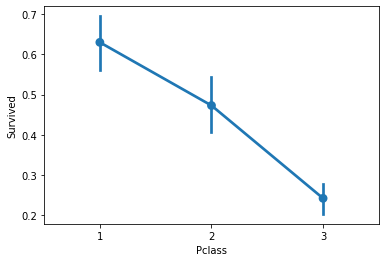

In [ ]:
sns.pointplot('Pclass','Survived',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


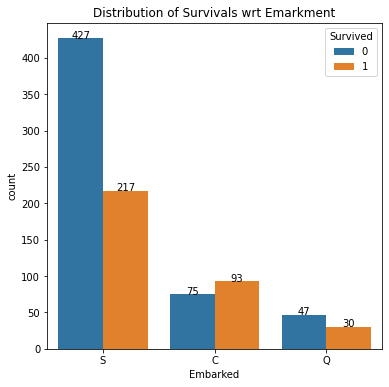

In [ ]:
plt.subplots(figsize=(6,6))
graph=sns.countplot('Embarked',hue='Survived',data=df)
graph.set_title('Distribution of Survivals wrt Emarkment')
for p in graph.patches:
  height=p.get_height()
  graph.text(p.get_x()+p.get_width()/2,height+0.1,height,ha='center')

Embarkement plays a major roll in survival.

There were two missing values in Embarked. And as per the above Plot 'S' is in majority. So we'll fill Embarked missing with 'S'.


Text(0.5, 1.0, 'Distribution of Survivals wrt Age')

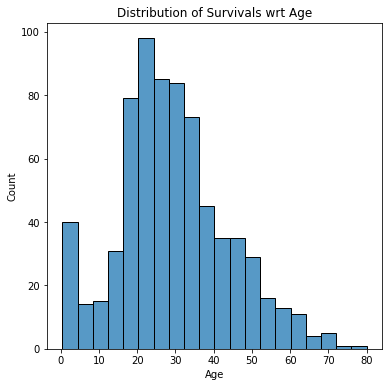

In [ ]:
plt.subplots(figsize=(6,6))
graph=sns.histplot(x='Age',data=df)
graph.set_title('Distribution of Survivals wrt Age')

#Imputation

In [ ]:
df['Embarked'].fillna('S', inplace=True)

In [ ]:
df_mean=df['Age'].mean()
df['Age'].fillna(df_mean,inplace=True)

. When the data is skewed, it is good to consider using the mode value for replacing the missing values.

In [ ]:
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean(),inplace=True)


In [ ]:
#Check for Missing Values Again
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Text(0, 0.5, 'Fare')

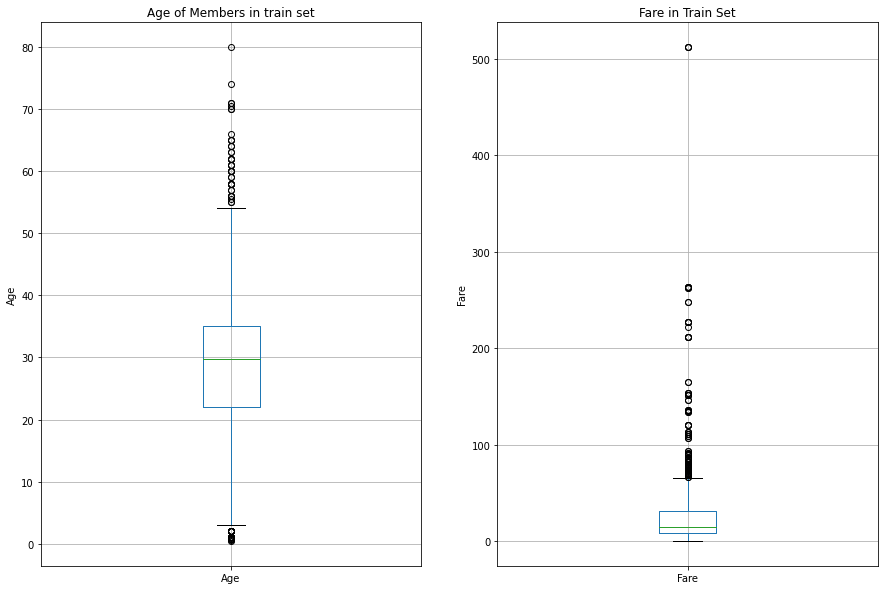

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(1, 2, 1)
fig = df.boxplot(column='Age')
fig.set_title('Age of Members in train set')
fig.set_ylabel('Age')


plt.subplot(1, 2, 2)
fig = df.boxplot(column='Fare')
fig.set_title('Fare in Train Set')
fig.set_ylabel('Fare')

In [ ]:
# There are lots of outliers in Age and Fares. 
# Since we have a small dataset we will cap them.

In [83]:
percentile25=df['Age'].quantile(0.25)
percentile75=df['Age'].quantile(0.75)
IQR_train_age=percentile75-percentile25
upper_limit_train_age=percentile75+1.5*IQR_train_age
lower_limit_train_age=percentile25-1.5*IQR_train_age

percentile25_fare_train=df['Fare'].quantile(0.25)
percentile75_fare_train=df['Fare'].quantile(0.75)
IQR_train_fare=percentile75_fare_train-percentile25_fare_train
upper_limit_train_fare=percentile75+1.5*IQR_train_fare
lower_limit_train_fare=percentile25-1.5*IQR_train_fare

print("upper_limit_train_age :{}".format(upper_limit_train_age),
      "\nlower_limit_train_age:{}".format(lower_limit_train_age),
      "\nupper_limit_train_fare:{}".format(upper_limit_train_fare),
      "\nlower_limit_train_fare:{}".format(lower_limit_train_fare))

upper_limit_train_age :54.5 
lower_limit_train_age:2.5 
upper_limit_train_fare:69.6344 
lower_limit_train_fare:-12.6344


AS lower fare can't be negative so.. ignore. and consider lowest fare as lower_limit_train_fare.

In [86]:
lower_limit_train_fare=df['Fare'].min()

In [87]:
# Capping
new_df_cap=df.copy()

#if new_df_cap['Age']>=upper_limit_train_age:
 # new_df_cap['Age']=upper_limit_train_age
#if new_df_cap['Fare']>=upper_limit_train_fare:
#  new_df_cap['Fare']=upper_limit_train_fare

new_df_cap['Age']=np.where(new_df_cap['Age']>upper_limit_train_age,upper_limit_train_age,new_df_cap['Age'])
new_df_cap['Age']=np.where(new_df_cap['Age']<lower_limit_train_age,lower_limit_train_age,new_df_cap['Age'])
new_df_cap['Fare']=np.where(new_df_cap['Fare']>upper_limit_train_fare,upper_limit_train_fare,new_df_cap['Fare'])
new_df_cap['Fare']=np.where(new_df_cap['Fare']<lower_limit_train_fare,lower_limit_train_fare,new_df_cap['Fare'])

Text(0, 0.5, 'Fare')

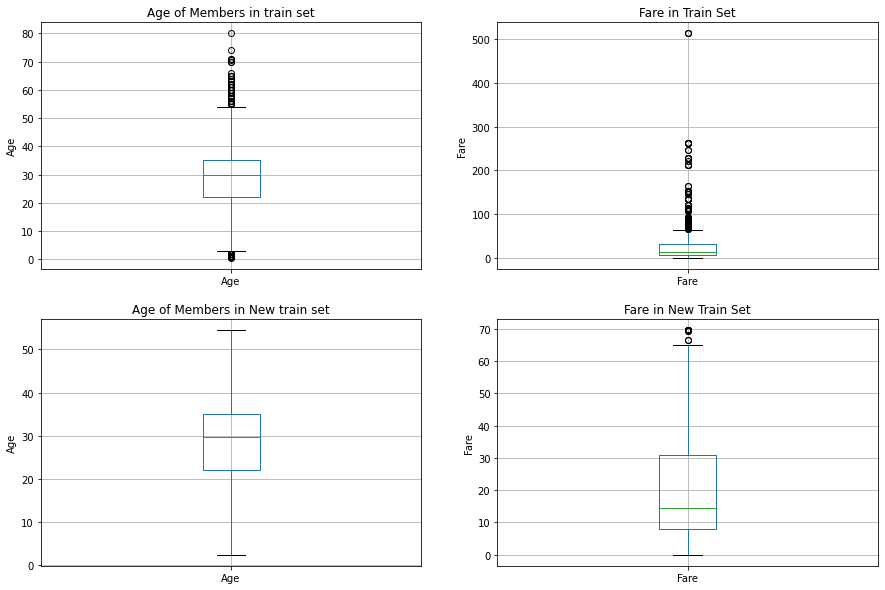

In [88]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Age')
fig.set_title('Age of Members in train set')
fig.set_ylabel('Age')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Fare')
fig.set_title('Fare in Train Set')
fig.set_ylabel('Fare')

plt.subplot(2, 2, 3)
fig = new_df_cap.boxplot(column='Age')
fig.set_title('Age of Members in New train set')
fig.set_ylabel('Age')


plt.subplot(2, 2, 4)
fig = new_df_cap.boxplot(column='Fare')
fig.set_title('Fare in New Train Set')
fig.set_ylabel('Fare')

In [75]:
a=np.array([1,2,3,4,6,7,8])
np.where(a>3,2,a)

array([1, 2, 3, 2, 2, 2, 2])

In [89]:
new_df_cap.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,69.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [90]:
#new_df_cap['Sex'].map('male':0,'female':1)

array(['male', 'female'], dtype=object)

In [91]:
#new_df_cap['Embarked'].map('S':1,'C':2,'Q':3)

array(['S', 'C', 'Q'], dtype=object)

In [107]:
new_df_cap.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,69.6344,C


In [114]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
labelenc=LabelEncoder()

categorical=['Embarked','Sex']
for col in categorical:
    new_df_cap[col]=labelenc.fit_transform(new_df_cap[col])
    df_test[col]=labelenc.fit_transform(df_test[col])


In [113]:
percen25=df_test['Age'].quantile(0.25)
percen75=df_test['Age'].quantile(0.75)
IQR_test_age=percen75-percen25
upper_limit_test_age=percen75+1.5*IQR_test_age
lower_limit_test_age=percen25-1.5*IQR_test_age

percen25_fare_test=df_test['Fare'].quantile(0.25)
percen75_fare_test=df_test['Fare'].quantile(0.75)
IQR_test_fare=percen75_fare_test-percen25_fare_test
upper_limit_test_fare=percen75+1.5*IQR_test_fare
lower_limit_test_fare=percen25-1.5*IQR_test_fare

new_df_test=df_test.copy()

new_df_test['Age']=np.where(new_df_test['Age']>upper_limit_test_age,upper_limit_test_age,new_df_test['Age'])
new_df_test['Age']=np.where(new_df_test['Age']<lower_limit_test_age,lower_limit_test_age,new_df_test['Age'])
new_df_test['Fare']=np.where(new_df_test['Fare']>upper_limit_test_fare,upper_limit_test_fare,new_df_test['Fare'])
new_df_test['Fare']=np.where(new_df_test['Fare']<lower_limit_test_fare,lower_limit_test_fare,new_df_test['Fare'])

In [116]:
new_df_cap.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,69.6344,0


In [117]:
new_df_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2


#Scaling

In [118]:
scaler=StandardScaler()

In [122]:
new_df_cap[['Age','Fare']]=scaler.fit_transform(new_df_cap[['Age','Fare']])
new_df_test[['Age','Fare']]=scaler.fit_transform(new_df_test[['Age','Fare']])

# Modelling

In [127]:
X=new_df_cap.drop(columns = ['Survived'],axis=1)
y=new_df_cap['Survived']

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb

names = ["Logistic Regression", "Nearest Neighbors",
         "Naive Bayes", "Linear SVM","Decision Tree",
         "Random Forest","LDA", "QDA", "Neural Net", "LightGBM", "XGBoost" ]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    GaussianNB(),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(alpha=1, max_iter=1000),
    lgb.LGBMClassifier(),    
    xgb.XGBClassifier()
   ]

accuracy_scores = []
# iterate over classifiers and predict accuracy
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score = round(score, 4)
    accuracy_scores.append(score)
    print(name ,' : ' , score)

Logistic Regression  :  0.8045
Nearest Neighbors  :  0.8101
Naive Bayes  :  0.7598
Linear SVM  :  0.7821
Decision Tree  :  0.8101
Random Forest  :  0.7821
LDA  :  0.7877
QDA  :  0.8045
Neural Net  :  0.8101
LightGBM  :  0.8212
XGBoost  :  0.8101


In [144]:
# LightGBM has the highest score.
# Tune Hyperparametes of LightGBM
from sklearn.model_selection import GridSearchCV
lgb_clf = lgb.LGBMClassifier()
lgb_params={'learning_rate': [0.005],
    'num_leaves': [6,8,12,16],
    'objective' : ['binary'],
    'colsample_bytree' : [0.5, 0.6],
    'subsample' : [0.65,0.66],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

lgb_grid_search = GridSearchCV(estimator = lgb_clf,  
                               param_grid = lgb_params,
                               scoring = 'accuracy',
                               cv = 5,
                               verbose=0)
lgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.5, 0.6],
                         'learning_rate': [0.005], 'num_leaves': [6, 8, 12, 16],
                         'objective': ['binary'], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.2, 1.4],
                         'subsample': [0.65, 0.66]},
             scoring='accuracy')

In [145]:
# best score achieved during the GridSearchCV
print('LightGBM GridSearch CV best score : {:.4f}\n\n'.format(lgb_grid_search.best_score_))

# print parameters that give the best results
print('LightGBM Parameters that give the best results :','\n\n', (lgb_grid_search.best_params_))

# print estimator that was chosen by the GridSearch
lgb_best = lgb_grid_search.best_estimator_
print('\n\nLightGBM Estimator that was chosen by the search :','\n\n', (lgb_best))

LightGBM GridSearch CV best score : 0.7851


LightGBM Parameters that give the best results : 

 {'colsample_bytree': 0.6, 'learning_rate': 0.005, 'num_leaves': 6, 'objective': 'binary', 'reg_alpha': 1, 'reg_lambda': 1, 'subsample': 0.65}


LightGBM Estimator that was chosen by the search : 

 LGBMClassifier(colsample_bytree=0.6, learning_rate=0.005, num_leaves=6,
               objective='binary', reg_alpha=1, reg_lambda=1, subsample=0.65)


In [146]:
lgb_best_model=lgb.LGBMClassifier(colsample_bytree=0.6, learning_rate=0.005, num_leaves=6,
               objective='binary', reg_alpha=1, reg_lambda=1, subsample=0.65)

In [147]:
lgb_best_model.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.6, learning_rate=0.005, num_leaves=6,
               objective='binary', reg_alpha=1, reg_lambda=1, subsample=0.65)

In [148]:
lgb_score = lgb_best_model.score(X_test, y_test)
print("LGB Best Model Score:{}".format(lgb_score))

LGB Best Model Score:0.7653631284916201


In [158]:
test_survived=pd.Series(lgb_best_model.predict(new_df_test),name="Survived")

# Submission

In [162]:
submission=pd.concat([test_survived,df_test2['PassengerId']],axis=1)

In [163]:
submission.to_csv("titanic_test_submission.csv",index=False)
from google.colab import files
files.download("titanic_test_submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>